In [1]:
import numpy as np
import pandas as pd
import os
import sys

cwd = os.getcwd()
frameworkDir = os.path.abspath(os.path.join(cwd, os.pardir, 'src'))
sys.path.append(frameworkDir)

data_path = os.path.abspath(os.path.join(cwd, os.pardir, 'tests', 'anomaly_detection', 'data'))

taxi_data_file = os.path.abspath(os.path.join(data_path, 'nyc_taxi_passengers.csv'))

from dackar.anomalies.MatrixProfile import MatrixProfile

/Users/wangc/projects/miniconda3/envs/dackar_libs/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Warming up PyWSD (takes ~10 secs)... took 2.1885361671447754 secs.


In [2]:

taxi_df = pd.read_csv(taxi_data_file, index_col='timestamp')
taxi_df['value'] = taxi_df['value'].astype(np.float64)
taxi_df.index = pd.to_datetime(taxi_df.index, errors='ignore')
taxi_df.head()

/var/folders/7s/fr8pr05118g9qnw_gf5_dyfhz5v12v/T/ipykernel_45479/1468471238.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  taxi_df.index = pd.to_datetime(taxi_df.index, errors='ignore')
/var/folders/7s/fr8pr05118g9qnw_gf5_dyfhz5v12v/T/ipykernel_45479/1468471238.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  taxi_df.index = pd.to_datetime(taxi_df.index, errors='ignore')


,value
timestamp,
2014-10-01 00:00:00,12751.0
2014-10-01 00:30:00,8767.0
2014-10-01 01:00:00,7005.0
2014-10-01 01:30:00,5257.0
2014-10-01 02:00:00,4189.0


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


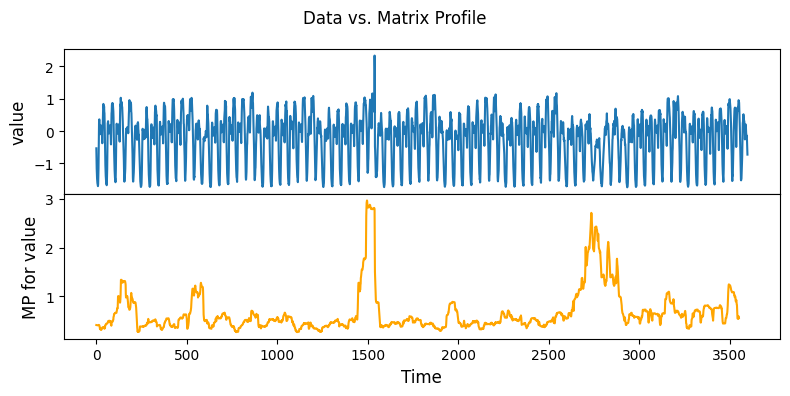

In [3]:
m = 48
mpObj = MatrixProfile(m, normalize='robust', method='normal')
mpObj.fit(taxi_df)
fig = mpObj.plot()

In [4]:
steam_gen_data_file = os.path.abspath(os.path.join(data_path, 'Steamgen.csv'))
steam_df = pd.read_csv(steam_gen_data_file)
steam_df.head()

,drum pressure,excess oxygen,water level,steam flow
0,320.08239,2.506774,0.032701,9.302970
1,321.71099,2.545908,0.284799,9.662621
2,320.91331,2.360562,0.203652,10.990955
3,325.00252,0.027054,0.326187,12.430107
4,326.65276,0.285649,0.753776,13.681666


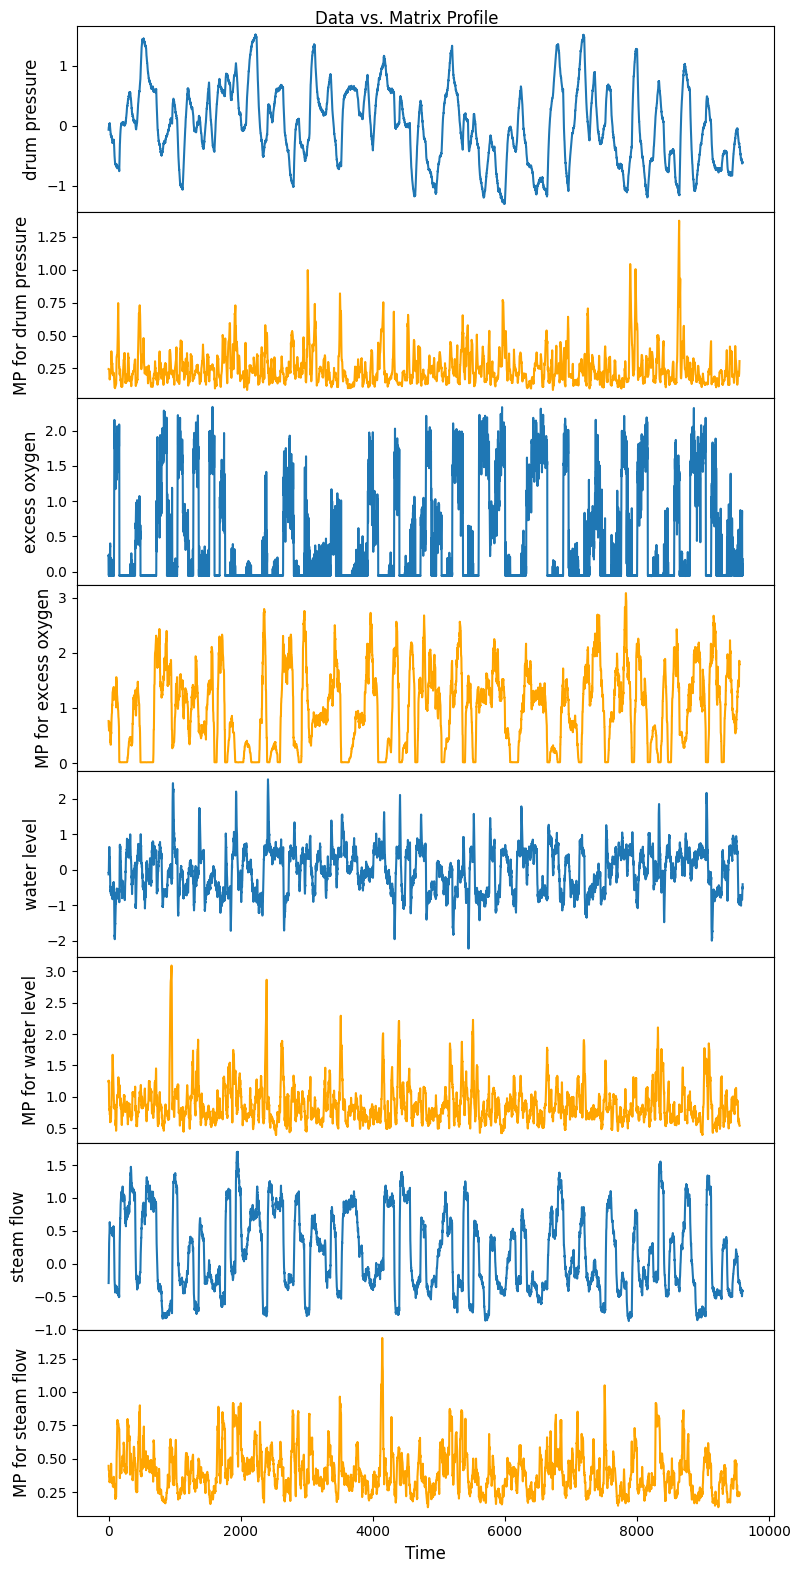

In [5]:
m = 48
mpObj = MatrixProfile(m, normalize='robust', method='normal')
mpObj.fit(steam_df)
fig = mpObj.plot()

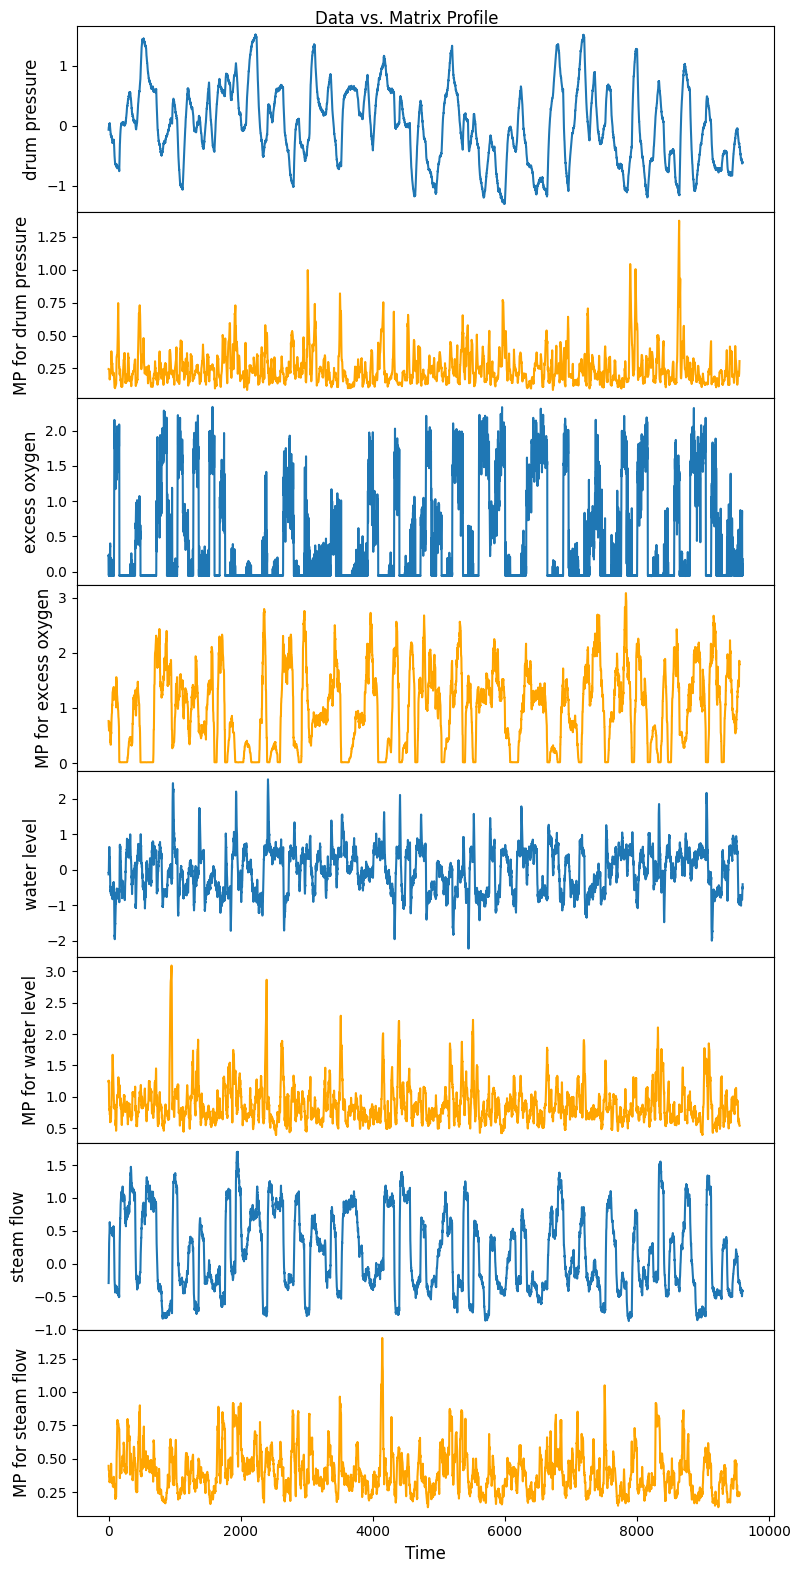

In [6]:
m = 48
mpObj = MatrixProfile(m, normalize='robust', method='parallel')
mpObj.fit(steam_df)
fig = mpObj.plot()

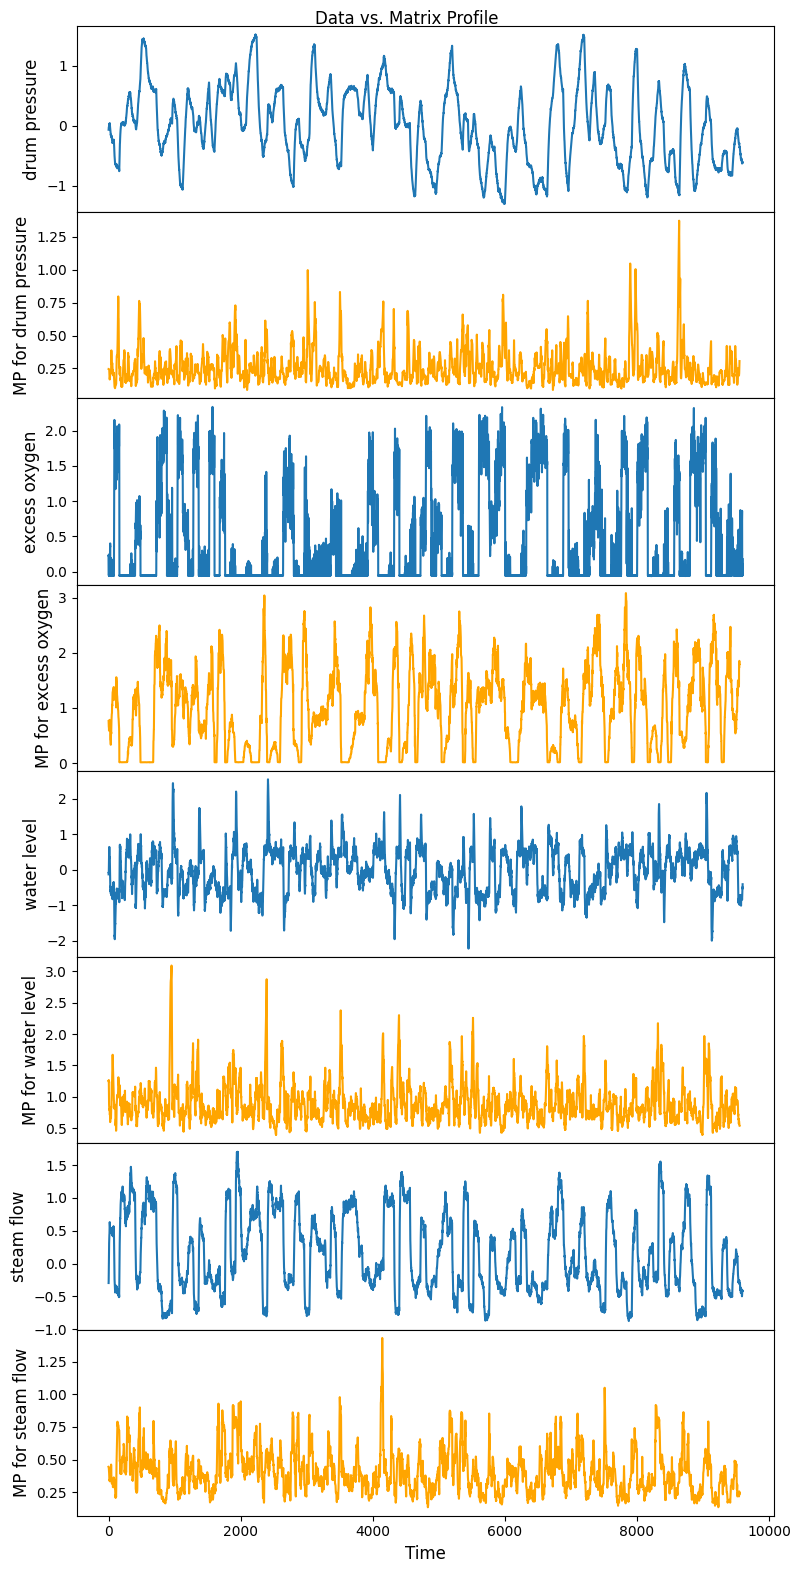

In [7]:
m = 48
mpObj = MatrixProfile(m, normalize='robust', method='approx')
mpObj.fit(steam_df)
fig = mpObj.plot()

### Enable Streaming

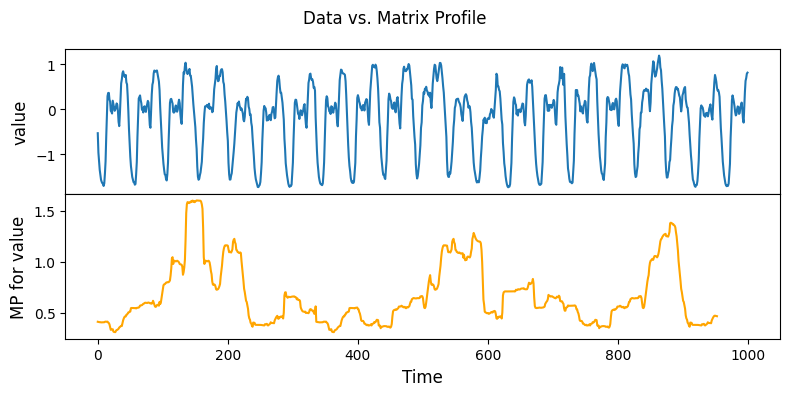

In [8]:
m = 48
mpObj = MatrixProfile(m, normalize='robust', method='incremental')
mpObj.fit(taxi_df.iloc[0:1000])
fig = mpObj.plot()

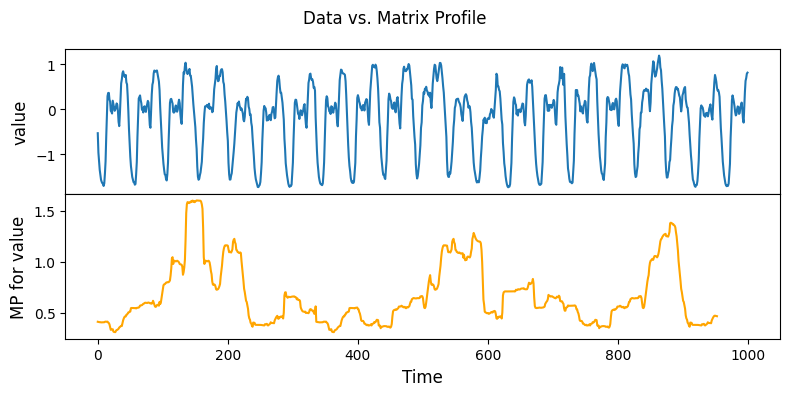

In [9]:
for i in range(1000, taxi_df.shape[1]):
  mpObj.evaluate(taxi_df.iloc[i])
fig = mpObj.plot()